# PyJive workshop: stability of a house-shaped frame

## Case definition
In this workshop, you are asked to set up your own problem and analyse it from different angles, using the `FrameModel` and different modules from pyJive as discussed in previous workshops. The case that is studied is the one illustrated below. 

<center><img src="https://raw.githubusercontent.com/fmeer/public-files/main/ciem5110/formativeFrame.png" alt="Simple frame" width="300"/></center>



In [1]:
import matplotlib.pyplot as plt
import numpy as np

import os
import sys

pyjivepath = '../../../pyjive/'
sys.path.append(pyjivepath)

if not os.path.isfile(pyjivepath + 'utils/proputils.py'):
    print('\n\n**pyjive cannot be found, adapt "pyjivepath" above or move notebook to appropriate folder**\n\n')
    raise Exception('pyjive not found')

from utils import proputils as pu
import main
from names import GlobNames as gn

%matplotlib widget

## Linear elastic analysis
Define your own pair of geometry file and input file and perform a linear elastic analysis. A good starting point could be the `frameNonlin.pro` input file from the workshop on buckling. Make sure you switch off nonlinearity. 

Initializing module chain...
InitModule: Creating DofSpace...
InitModule: Reading geo mesh file house.geom ...
InitModule: Creating node groups...
InitModule: Created group bot with nodes [0, 4]
InitModule: Created group top with nodes [2]
InitModule: Creating model...
Creating Line2Shape...
Running chain...
Running time step 0


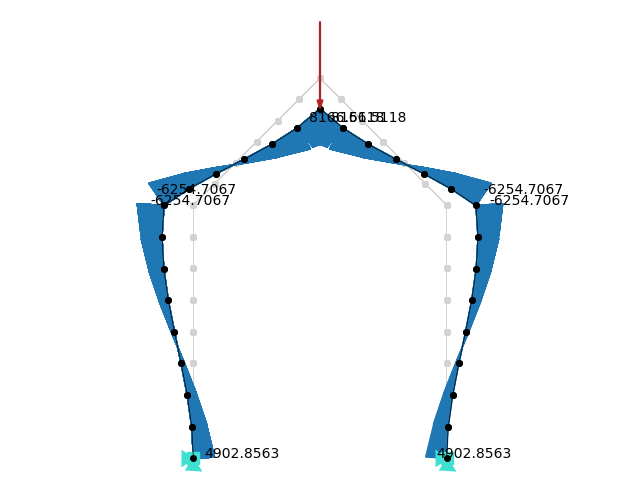

End of execution


In [2]:
# In the input file, the SolverModule is specified
# for a linear-elastic problem, we only need to solve a system of equations once.
# the load level is adapted to be high enough for meaningful comparison later on
# In the solution the moment line is visualized on the deformed frame
# no slider because there are no "time steps"

props = pu.parse_file('house-linear.pro')
globdat = main.jive(props)

#### Storing results
Below, a function is defined to looks up load-displacement data from globdat. The function is then called to store the data from the linear elastic analysis. This can later be used to compare the results from different analyses in a single diagram.

You need to modify the function to get relevant load/displacement data. Note that in order to record data for a particular node group, you need to specify this group in the `loaddisp` part of the `.pro`-file. 



In [3]:
def getFu(globdat):
    F = abs(globdat['loaddisp']['top']['load']['dy'])
    u = abs(globdat['loaddisp']['top']['disp']['dy'])
    return np.vstack((u,F))

lin_elas = getFu(globdat)

# pad with zeros because linear elastic gives only one force-displacement point
lin_elas = np.hstack((np.zeros((2,1)), lin_elas))

## Linear buckling analysis
Now perform linear buckling analysis. You are recommended to make a new input file because quite several modifications need to be made. Again, you can take one from the buckling workshop as starting point. 

Initializing module chain...
InitModule: Creating DofSpace...
InitModule: Reading geo mesh file house.geom ...
InitModule: Creating node groups...
InitModule: Created group bot with nodes [0, 4]
InitModule: Created group top with nodes [2]
InitModule: Creating model...
Creating Line2Shape...
Running chain...
LinBuckModule: running unit load analysis...
LinBuckModule: running eigenvalue problem...
LinBuckModule: critical load factor:  3.177e+04


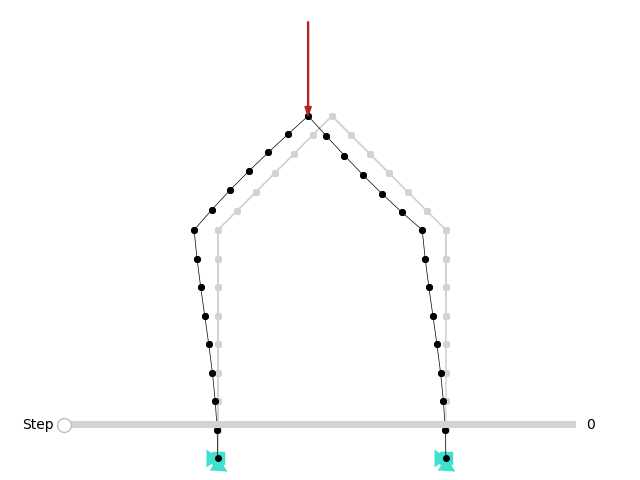

End of execution


In [4]:
# In this input file the LinBuckModule is used instead of the SolverModule
# Load magnitude is set to 1, such that scale factor is directly interpretable as buckling load

# This time the plot does have a slider the solution contains multiple buckling modes

props = pu.parse_file('house-lb.pro')
globdat = main.jive(props)
bucklingLoad = globdat[gn.LBFACTORS][0]

## Geometrically nonlinear elastic analysis
The next step is to perform geometrically nonlinear elastic analysis. You can take the input file from the linear-elastic analysis and overwrite one of the entries in the notebook. How do the results compare to the results from linear buckling analysis (in terms of buckling load and buckling mode)?

Initializing module chain...
InitModule: Creating DofSpace...
InitModule: Reading geo mesh file house.geom ...
InitModule: Creating node groups...
InitModule: Created group bot with nodes [0, 4]
InitModule: Created group top with nodes [2]
InitModule: Creating model...
Creating Line2Shape...
Running chain...
Running time step 0
Iteration 1, relative residual norm: 1.0134e+02
Iteration 2, relative residual norm: 9.0090e-04
Iteration 3, relative residual norm: 8.2723e-09
Converged after 3 iterations

Iteration 1, relative residual norm: 1.6139e-01
Iteration 2, relative residual norm: 1.4051e-06
Iteration 3, relative residual norm: 2.0816e-11
Converged after 3 iterations

Running time step 2
Iteration 1, relative residual norm: 8.0607e-02
Iteration 2, relative residual norm: 6.8733e-07
Converged after 2 iterations

Iteration 1, relative residual norm: 5.3679e-02
Iteration 2, relative residual norm: 4.4837e-07
Converged after 2 iterations

Running time step 4
Iteration 1, relative residual

Iteration 2, relative residual norm: 7.7533e-09
Converged after 2 iterations

Iteration 1, relative residual norm: 2.4553e-03
Iteration 2, relative residual norm: 7.5248e-09
Converged after 2 iterations

Running time step 64
Iteration 1, relative residual norm: 2.4165e-03
Iteration 2, relative residual norm: 7.3057e-09
Converged after 2 iterations

Iteration 1, relative residual norm: 2.3788e-03
Iteration 2, relative residual norm: 7.0953e-09
Converged after 2 iterations

Running time step 66
Iteration 1, relative residual norm: 2.3424e-03
Iteration 2, relative residual norm: 6.8931e-09
Converged after 2 iterations

Iteration 1, relative residual norm: 2.3070e-03
Iteration 2, relative residual norm: 6.6990e-09
Converged after 2 iterations

Running time step 68
Iteration 1, relative residual norm: 2.2727e-03
Iteration 2, relative residual norm: 6.5124e-09
Converged after 2 iterations

Iteration 1, relative residual norm: 2.2395e-03
Iteration 2, relative residual norm: 6.3328e-09
Converg

Running time step 128
Iteration 1, relative residual norm: 1.2258e-03
Iteration 2, relative residual norm: 1.7827e-09
Converged after 2 iterations

Iteration 1, relative residual norm: 1.2170e-03
Iteration 2, relative residual norm: 1.7531e-09
Converged after 2 iterations

Running time step 130
Iteration 1, relative residual norm: 1.2084e-03
Iteration 2, relative residual norm: 1.7242e-09
Converged after 2 iterations

Iteration 1, relative residual norm: 1.2000e-03
Iteration 2, relative residual norm: 1.6960e-09
Converged after 2 iterations

Running time step 132
Iteration 1, relative residual norm: 1.1917e-03
Iteration 2, relative residual norm: 1.6684e-09
Converged after 2 iterations

Iteration 1, relative residual norm: 1.1835e-03
Iteration 2, relative residual norm: 1.6416e-09
Converged after 2 iterations

Running time step 134
Iteration 1, relative residual norm: 1.1755e-03
Iteration 2, relative residual norm: 1.6153e-09
Converged after 2 iterations

Iteration 1, relative residual

Iteration 1, relative residual norm: 8.6946e-04
Iteration 2, relative residual norm: 7.5997e-10
Converged after 2 iterations

Iteration 1, relative residual norm: 8.6609e-04
Iteration 2, relative residual norm: 7.5238e-10
Converged after 2 iterations

Running time step 194
Iteration 1, relative residual norm: 8.6276e-04
Iteration 2, relative residual norm: 7.4494e-10
Converged after 2 iterations

Iteration 1, relative residual norm: 8.5948e-04
Iteration 2, relative residual norm: 7.3761e-10
Converged after 2 iterations

Running time step 196
Iteration 1, relative residual norm: 8.5624e-04
Iteration 2, relative residual norm: 7.3043e-10
Converged after 2 iterations

Iteration 1, relative residual norm: 8.5304e-04
Iteration 2, relative residual norm: 7.2341e-10
Converged after 2 iterations

Running time step 198
Iteration 1, relative residual norm: 8.4989e-04
Iteration 2, relative residual norm: 7.1655e-10
Converged after 2 iterations

Iteration 1, relative residual norm: 8.4678e-04
Iter

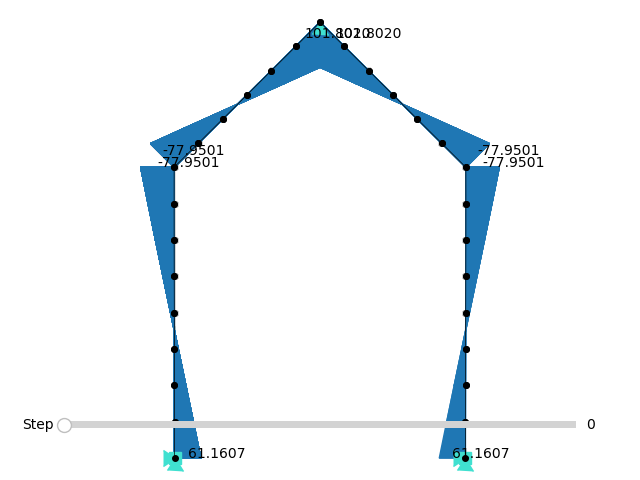

End of execution


In [5]:
# Again with a new input file, changes with respect to house-linear.pro are 
# - subtype = "nonlin" (to use a nonlinear solver)
# - NonlinModule instead of SolverModule to use incremental-iterative scheme
# - displacement control instead of load control
# - FrameViewModule is interactive: there will be a slider this time
# Arclength-control is not necessary here, but also works


props = pu.parse_file('house-nonlin.pro')
globdat = main.jive(props)

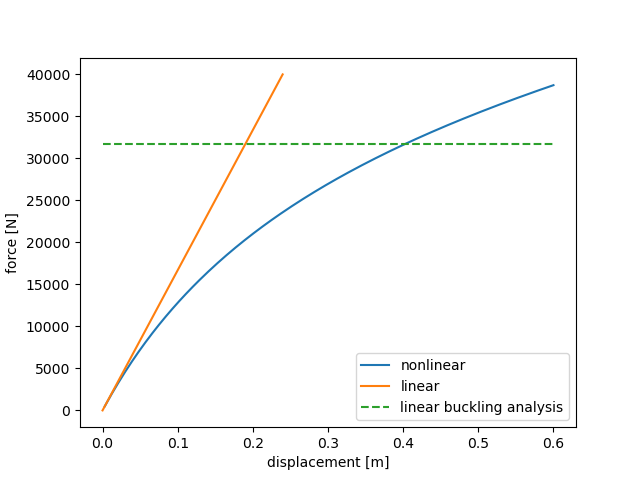

In [6]:
# A first comparison between load-displacement results from two analyses

nonlin_elas = getFu(globdat)


plt.close('all')
plt.plot(nonlin_elas[0],nonlin_elas[1],label='nonlinear')
plt.plot(lin_elas[0],lin_elas[1],label='linear')
plt.plot([0,0.6],[bucklingLoad,bucklingLoad],'--',label='linear buckling analysis')
plt.legend()
plt.xlabel('displacement [m]')
plt.ylabel('force [N]')
plt.show()



## Geometrically linear elastic/plastic analysis
Next, perform a geometrically linear analysis with plastic hinges. Again, take the previous input file as starting point.

Initializing module chain...
InitModule: Creating DofSpace...
InitModule: Reading geo mesh file house.geom ...
InitModule: Creating node groups...
InitModule: Created group bot with nodes [0, 4]
InitModule: Created group top with nodes [2]
InitModule: Creating model...
Creating Line2Shape...
Running chain...
Running time step 0
Iteration 1, relative residual norm: 1.1842e-10
Converged after 1 iterations

Iteration 1, relative residual norm: 2.9515e-13
Converged after 1 iterations

Running time step 2
Iteration 1, relative residual norm: 2.3653e-13
Converged after 1 iterations

Iteration 1, relative residual norm: 1.6987e-13
Converged after 1 iterations

Running time step 4
Iteration 1, relative residual norm: 2.3094e-13
Converged after 1 iterations

Iteration 1, relative residual norm: 2.3090e-13
Converged after 1 iterations

Running time step 6
Iteration 1, relative residual norm: 2.7173e-13
Converged after 1 iterations

Iteration 1, relative residual norm: 1.4736e-13
Converged after 

Converged after 1 iterations

Iteration 1, relative residual norm: 3.7864e-13
Converged after 1 iterations

Running time step 88
Iteration 1, relative residual norm: 5.2066e-13
Converged after 1 iterations

Iteration 1, relative residual norm: 3.5095e-13
Converged after 1 iterations

Running time step 90
Iteration 1, relative residual norm: 3.6235e-13
Converged after 1 iterations

Iteration 1, relative residual norm: 3.9092e-13
Converged after 1 iterations

Running time step 92
Iteration 1, relative residual norm: 3.7612e-13
Converged after 1 iterations

Iteration 1, relative residual norm: 5.1628e-13
Converged after 1 iterations

Running time step 94
Iteration 1, relative residual norm: 4.0976e-13
Converged after 1 iterations

Iteration 1, relative residual norm: 3.3773e-13
Converged after 1 iterations

Running time step 96
Iteration 1, relative residual norm: 4.2602e-13
Converged after 1 iterations

Iteration 1, relative residual norm: 4.0190e-13
Converged after 1 iterations

Running

Iteration 1, relative residual norm: 7.4553e-13
Converged after 1 iterations

Iteration 1, relative residual norm: 1.0533e-12
Converged after 1 iterations

Running time step 186
Iteration 1, relative residual norm: 9.9771e-13
Converged after 1 iterations

Iteration 1, relative residual norm: 1.2479e-12
Converged after 1 iterations

Running time step 188
Iteration 1, relative residual norm: 8.5962e-13
Converged after 1 iterations

Iteration 1, relative residual norm: 7.3019e-13
Converged after 1 iterations

Running time step 190
Iteration 1, relative residual norm: 1.2131e-12
Converged after 1 iterations

Iteration 1, relative residual norm: 9.9623e-13
Converged after 1 iterations

Running time step 192
Iteration 1, relative residual norm: 7.3294e-13
Converged after 1 iterations

Iteration 1, relative residual norm: 7.7478e-13
Converged after 1 iterations

Running time step 194
Iteration 1, relative residual norm: 8.8449e-13
Converged after 1 iterations

Iteration 1, relative residual n

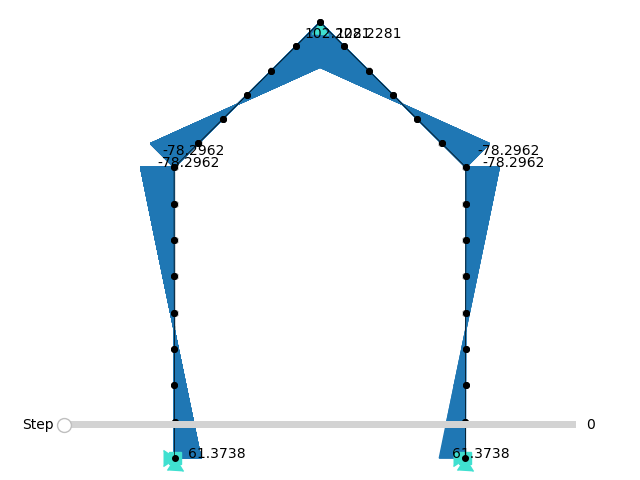

End of execution


In [7]:
# Two inputs are added related to plasticity
# For geometric linear analysis, set subtype to 'linear'

props['model']['frame']['plastic'] = 'True'
props['model']['frame']['Mp'] = 3000;
props['model']['frame']['subtype'] = 'linear'

globdat = main.jive(props)

lin_plas = getFu(globdat)

## Geometrically nonlinear elastic/plastic analysis
As last analysis, perform a complete nonlinear finite element simulation with geometric nonlinearity and plastic hinges. 

Initializing module chain...
InitModule: Creating DofSpace...
InitModule: Reading geo mesh file house.geom ...
InitModule: Creating node groups...
InitModule: Created group bot with nodes [0, 4]
InitModule: Created group top with nodes [2]
InitModule: Creating model...
Creating Line2Shape...
Running chain...
Running time step 0
Iteration 1, relative residual norm: 1.0134e+02
Iteration 2, relative residual norm: 9.0090e-04
Iteration 3, relative residual norm: 8.2723e-09
Converged after 3 iterations

Iteration 1, relative residual norm: 1.6139e-01
Iteration 2, relative residual norm: 1.4051e-06
Iteration 3, relative residual norm: 2.0816e-11
Converged after 3 iterations

Running time step 2
Iteration 1, relative residual norm: 8.0607e-02
Iteration 2, relative residual norm: 6.8733e-07
Converged after 2 iterations

Iteration 1, relative residual norm: 5.3679e-02
Iteration 2, relative residual norm: 4.4837e-07
Converged after 2 iterations

Running time step 4
Iteration 1, relative residual

Iteration 2, relative residual norm: 7.7563e-07
Adding plastic hinge on node 4 (in element 27)
Running time step 60
Iteration 1, relative residual norm: 9.3370e-03
Iteration 2, relative residual norm: 1.5472e-05
Iteration 3, relative residual norm: 6.2388e-08
Converged after 3 iterations

Iteration 1, relative residual norm: 3.2232e-02
Iteration 2, relative residual norm: 8.1224e-05
Iteration 3, relative residual norm: 2.7347e-06
Iteration 4, relative residual norm: 3.2879e-12
Converged after 4 iterations

Running time step 62
Iteration 1, relative residual norm: 2.5818e-02
Iteration 2, relative residual norm: 4.5471e-05
Iteration 3, relative residual norm: 7.8176e-07
Converged after 3 iterations

Iteration 1, relative residual norm: 2.1662e-02
Iteration 2, relative residual norm: 2.7882e-05
Iteration 3, relative residual norm: 2.7793e-07
Converged after 3 iterations

Running time step 64
Iteration 1, relative residual norm: 1.8747e-02
Iteration 2, relative residual norm: 1.8288e-05
It

Iteration 1, relative residual norm: 3.9173e-03
Iteration 2, relative residual norm: 5.3127e-08
Converged after 2 iterations

Running time step 114
Iteration 1, relative residual norm: 3.8796e-03
Iteration 2, relative residual norm: 5.0689e-08
Converged after 2 iterations

Iteration 1, relative residual norm: 3.8431e-03
Iteration 2, relative residual norm: 4.8409e-08
Converged after 2 iterations

Running time step 116
Iteration 1, relative residual norm: 3.8077e-03
Iteration 2, relative residual norm: 4.6273e-08
Converged after 2 iterations

Iteration 1, relative residual norm: 3.7736e-03
Iteration 2, relative residual norm: 4.4270e-08
Converged after 2 iterations

Running time step 118
Iteration 1, relative residual norm: 3.7405e-03
Iteration 2, relative residual norm: 4.2389e-08
Converged after 2 iterations

Iteration 1, relative residual norm: 3.7084e-03
Iteration 2, relative residual norm: 4.0621e-08
Converged after 2 iterations

Running time step 120
Iteration 1, relative residual

Iteration 1, relative residual norm: 2.7500e-03
Iteration 2, relative residual norm: 8.5643e-09
Converged after 2 iterations

Running time step 174
Iteration 1, relative residual norm: 2.7397e-03
Iteration 2, relative residual norm: 8.3927e-09
Converged after 2 iterations

Iteration 1, relative residual norm: 2.7294e-03
Iteration 2, relative residual norm: 8.2254e-09
Converged after 2 iterations

Running time step 176
Iteration 1, relative residual norm: 2.7193e-03
Iteration 2, relative residual norm: 8.0636e-09
Converged after 2 iterations

Iteration 1, relative residual norm: 2.7094e-03
Iteration 2, relative residual norm: 7.9065e-09
Converged after 2 iterations

Running time step 178
Iteration 1, relative residual norm: 2.6995e-03
Iteration 2, relative residual norm: 7.7538e-09
Converged after 2 iterations

Iteration 1, relative residual norm: 2.6898e-03
Iteration 2, relative residual norm: 7.6054e-09
Converged after 2 iterations

Running time step 180
Iteration 1, relative residual

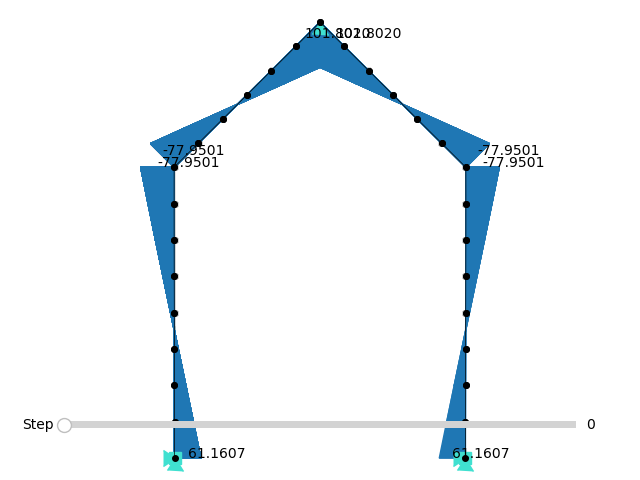

End of execution


In [8]:
# Make element formulation geometrically nonlinear again
props['model']['frame']['subtype'] = 'nonlin'
globdat = main.jive(props)

nonlin_plas = getFu(globdat)


### Comparison with results
Finally, compare the results from different analysis. 
Also include the rigid-plastic 2nd order analysis result (see [pdf](https://gitlab.tudelft.nl/cm/public/drive/-/raw/main/frame-assignment/CIEM5110_U1_assignmentA_solution.pdf) for background):

$$ 
F \approx \frac{6M_\mathrm{p}}{L}\left(1-2\textstyle\frac13\theta\right)
$$

Suppose you want to check this analytical solution, what can you change to the model inputs to get more definite insight in its validity? 

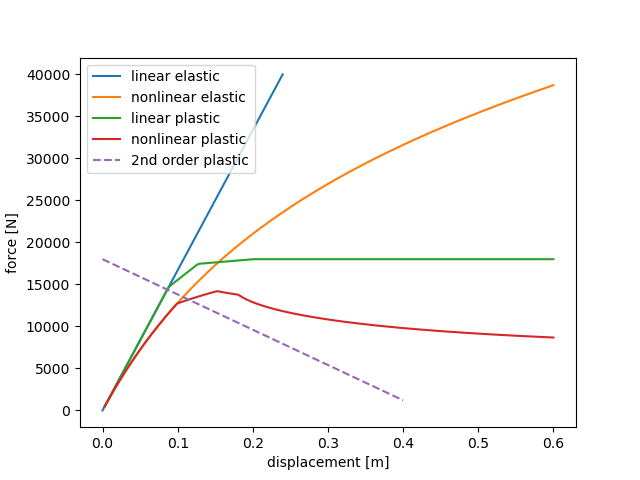

In [9]:
# Compare results from the different analyses in a single figure
plt.figure()
plt.plot(lin_elas[0],lin_elas[1],label='linear elastic')
plt.plot(nonlin_elas[0],nonlin_elas[1],label='nonlinear elastic')
plt.plot(lin_plas[0],lin_plas[1],label='linear plastic')
plt.plot(nonlin_plas[0],nonlin_plas[1],label='nonlinear plastic')
plt.xlabel('displacement [m]')
plt.ylabel('force [N]')

# Add analytical solution (note that for this geometry, theta=uy[top])
Mp = props['model']['frame']['Mp']
L = 1
theta = np.arange(0,0.41,0.01)
F_analytical = 6*Mp/L*(1-7/3*theta)
plt.plot(theta,F_analytical,'--',label='2nd order plastic')
plt.legend()


Initializing module chain...
InitModule: Creating DofSpace...
InitModule: Reading geo mesh file house.geom ...
InitModule: Creating node groups...
InitModule: Created group bot with nodes [0, 4]
InitModule: Created group top with nodes [2]
InitModule: Creating model...
Creating Line2Shape...
Running chain...
Running time step 0
Iteration 1, relative residual norm: 1.3989e+00
Iteration 2, relative residual norm: 6.7488e-08
Adding plastic hinge on node 2 (in element 14)
Running time step 0
Iteration 1, relative residual norm: 1.1838e-05
Iteration 2, relative residual norm: 5.6924e-13
Adding plastic hinge on node 1 (in element 8)
Running time step 0
Iteration 1, relative residual norm: 2.7021e-07
Adding plastic hinge on node 3 (in element 20)
Running time step 0
Iteration 1, relative residual norm: 2.6240e-07
Converged after 1 iterations

Iteration 1, relative residual norm: 1.3407e-03
Iteration 2, relative residual norm: 1.9238e-09
Adding plastic hinge on node 0 (in element 0)
Iteration 

Iteration 1, relative residual norm: 2.4528e-03
Iteration 2, relative residual norm: 1.1228e-08
Converged after 2 iterations

Running time step 58
Iteration 1, relative residual norm: 2.4520e-03
Iteration 2, relative residual norm: 1.1037e-08
Converged after 2 iterations

Iteration 1, relative residual norm: 2.4513e-03
Iteration 2, relative residual norm: 1.0851e-08
Converged after 2 iterations

Running time step 60
Iteration 1, relative residual norm: 2.4506e-03
Iteration 2, relative residual norm: 1.0671e-08
Converged after 2 iterations

Iteration 1, relative residual norm: 2.4499e-03
Iteration 2, relative residual norm: 1.0496e-08
Converged after 2 iterations

Running time step 62
Iteration 1, relative residual norm: 2.4493e-03
Iteration 2, relative residual norm: 1.0326e-08
Converged after 2 iterations

Iteration 1, relative residual norm: 2.4486e-03
Iteration 2, relative residual norm: 1.0161e-08
Converged after 2 iterations

Running time step 64
Iteration 1, relative residual nor

Iteration 2, relative residual norm: 5.2709e-09
Converged after 2 iterations

Iteration 1, relative residual norm: 2.4215e-03
Iteration 2, relative residual norm: 5.2248e-09
Converged after 2 iterations

Running time step 120
Iteration 1, relative residual norm: 2.4212e-03
Iteration 2, relative residual norm: 5.1797e-09
Converged after 2 iterations

Iteration 1, relative residual norm: 2.4209e-03
Iteration 2, relative residual norm: 5.1357e-09
Converged after 2 iterations

Running time step 122
Iteration 1, relative residual norm: 2.4207e-03
Iteration 2, relative residual norm: 5.0924e-09
Converged after 2 iterations

Iteration 1, relative residual norm: 2.4204e-03
Iteration 2, relative residual norm: 5.0499e-09
Converged after 2 iterations

Running time step 124
Iteration 1, relative residual norm: 2.4202e-03
Iteration 2, relative residual norm: 5.0081e-09
Converged after 2 iterations

Iteration 1, relative residual norm: 2.4199e-03
Iteration 2, relative residual norm: 4.9673e-09
Conv

Iteration 2, relative residual norm: 3.5721e-09
Converged after 2 iterations

Iteration 1, relative residual norm: 2.4207e-03
Iteration 2, relative residual norm: 3.5585e-09
Converged after 2 iterations

Running time step 182
Iteration 1, relative residual norm: 2.4211e-03
Iteration 2, relative residual norm: 3.5451e-09
Converged after 2 iterations

Iteration 1, relative residual norm: 2.4214e-03
Iteration 2, relative residual norm: 3.5325e-09
Converged after 2 iterations

Running time step 184
Iteration 1, relative residual norm: 2.4217e-03
Iteration 2, relative residual norm: 3.5196e-09
Converged after 2 iterations

Iteration 1, relative residual norm: 2.4221e-03
Iteration 2, relative residual norm: 3.5074e-09
Converged after 2 iterations

Running time step 186
Iteration 1, relative residual norm: 2.4225e-03
Iteration 2, relative residual norm: 3.4952e-09
Converged after 2 iterations

Iteration 1, relative residual norm: 2.4228e-03
Iteration 2, relative residual norm: 3.4838e-09
Conv

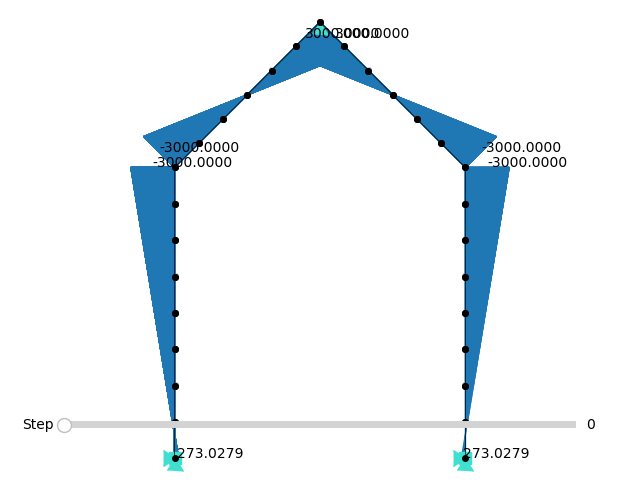

End of execution


In [10]:
props['model']['frame']['EI'] = 10.e6
globdat = main.jive(props)

rig_plas = getFu(globdat)
plt.plot(rig_plas[0],rig_plas[1])

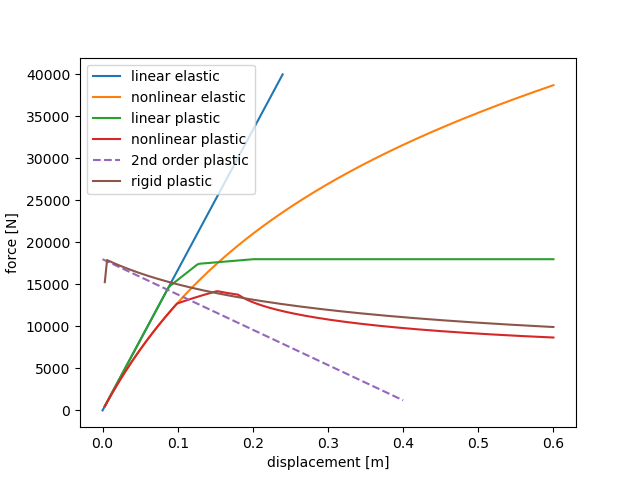

In [11]:
plt.figure()
plt.plot(lin_elas[0],lin_elas[1],label='linear elastic')
plt.plot(nonlin_elas[0],nonlin_elas[1],label='nonlinear elastic')
plt.plot(lin_plas[0],lin_plas[1],label='linear plastic')
plt.plot(nonlin_plas[0],nonlin_plas[1],label='nonlinear plastic')
plt.plot(theta,F_analytical,'--',label='2nd order plastic')
plt.plot(rig_plas[0],rig_plas[1],label='rigid plastic')
plt.xlabel('displacement [m]')
plt.ylabel('force [N]')
plt.legend()

## Bonus: go back to nonlinear elastic and add perturbation
By slightly moving the top node in the original geometry, symmetry of the structure is perturbed and a different solution is revealed. 

**Move the slider to see what happens to the displacements around the bifurcation point. Compare the deformation pattern to the critical buckling mode from linear buckling analysis.**

Initializing module chain...
InitModule: Creating DofSpace...
InitModule: Reading geo mesh file house-imperfect.geom ...
InitModule: Creating node groups...
InitModule: Created group bot with nodes [0, 4]
InitModule: Created group top with nodes [2]
InitModule: Creating model...
Creating Line2Shape...
Running chain...
Running time step 0
Iteration 1, relative residual norm: 1.0136e+02
Iteration 2, relative residual norm: 9.0171e-04
Iteration 3, relative residual norm: 1.1273e-08
Converged after 3 iterations

Iteration 1, relative residual norm: 1.6140e-01
Iteration 2, relative residual norm: 1.4060e-06
Iteration 3, relative residual norm: 1.5068e-11
Converged after 3 iterations

Running time step 2
Iteration 1, relative residual norm: 8.0609e-02
Iteration 2, relative residual norm: 6.8779e-07
Converged after 2 iterations

Iteration 1, relative residual norm: 5.3680e-02
Iteration 2, relative residual norm: 4.4867e-07
Converged after 2 iterations

Running time step 4
Iteration 1, relativ

Iteration 1, relative residual norm: 2.6245e-03
Iteration 2, relative residual norm: 8.5652e-09
Converged after 2 iterations

Running time step 60
Iteration 1, relative residual norm: 2.5801e-03
Iteration 2, relative residual norm: 8.3132e-09
Converged after 2 iterations

Iteration 1, relative residual norm: 2.5372e-03
Iteration 2, relative residual norm: 8.0730e-09
Converged after 2 iterations

Running time step 62
Iteration 1, relative residual norm: 2.4957e-03
Iteration 2, relative residual norm: 7.8444e-09
Converged after 2 iterations

Iteration 1, relative residual norm: 2.4555e-03
Iteration 2, relative residual norm: 7.6271e-09
Converged after 2 iterations

Running time step 64
Iteration 1, relative residual norm: 2.4167e-03
Iteration 2, relative residual norm: 7.4206e-09
Converged after 2 iterations

Iteration 1, relative residual norm: 2.3791e-03
Iteration 2, relative residual norm: 7.2249e-09
Converged after 2 iterations

Running time step 66
Iteration 1, relative residual nor

Iteration 1, relative residual norm: 4.1451e-02
Iteration 2, relative residual norm: 1.8103e-05
Iteration 3, relative residual norm: 3.8974e-05
Iteration 4, relative residual norm: 1.4310e-09
Converged after 4 iterations

Iteration 1, relative residual norm: 3.4047e-02
Iteration 2, relative residual norm: 1.6243e-05
Iteration 3, relative residual norm: 1.8519e-05
Iteration 4, relative residual norm: 2.8488e-10
Converged after 4 iterations

Running time step 118
Iteration 1, relative residual norm: 2.8626e-02
Iteration 2, relative residual norm: 1.3898e-05
Iteration 3, relative residual norm: 8.7124e-06
Iteration 4, relative residual norm: 5.6478e-11
Converged after 4 iterations

Iteration 1, relative residual norm: 2.4581e-02
Iteration 2, relative residual norm: 1.1571e-05
Iteration 3, relative residual norm: 4.2123e-06
Iteration 4, relative residual norm: 1.1995e-11
Converged after 4 iterations

Running time step 120
Iteration 1, relative residual norm: 2.1483e-02
Iteration 2, relativ

Iteration 1, relative residual norm: 2.9620e-03
Iteration 2, relative residual norm: 5.9885e-08
Converged after 2 iterations

Iteration 1, relative residual norm: 2.9110e-03
Iteration 2, relative residual norm: 5.6822e-08
Converged after 2 iterations

Running time step 170
Iteration 1, relative residual norm: 2.8618e-03
Iteration 2, relative residual norm: 5.3965e-08
Converged after 2 iterations

Iteration 1, relative residual norm: 2.8144e-03
Iteration 2, relative residual norm: 5.1296e-08
Converged after 2 iterations

Running time step 172
Iteration 1, relative residual norm: 2.7686e-03
Iteration 2, relative residual norm: 4.8800e-08
Converged after 2 iterations

Iteration 1, relative residual norm: 2.7243e-03
Iteration 2, relative residual norm: 4.6463e-08
Converged after 2 iterations

Running time step 174
Iteration 1, relative residual norm: 2.6814e-03
Iteration 2, relative residual norm: 4.4274e-08
Converged after 2 iterations

Iteration 1, relative residual norm: 2.6400e-03
Iter

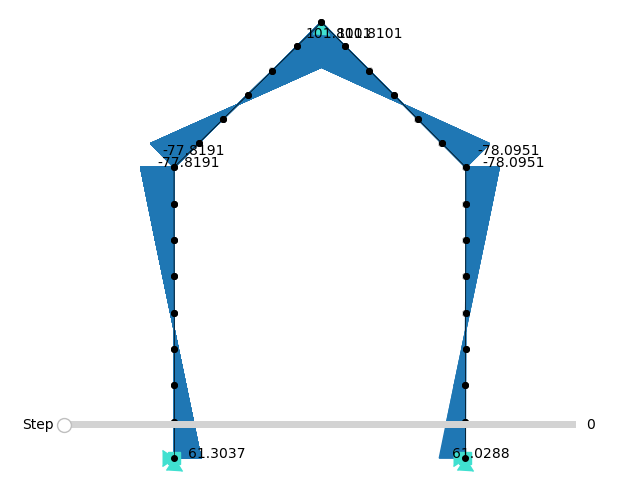

End of execution


In [12]:
props = pu.parse_file('house-nonlin.pro')
props['init']['mesh']['file'] = 'house-imperfect.geom'

globdat = main.jive(props)

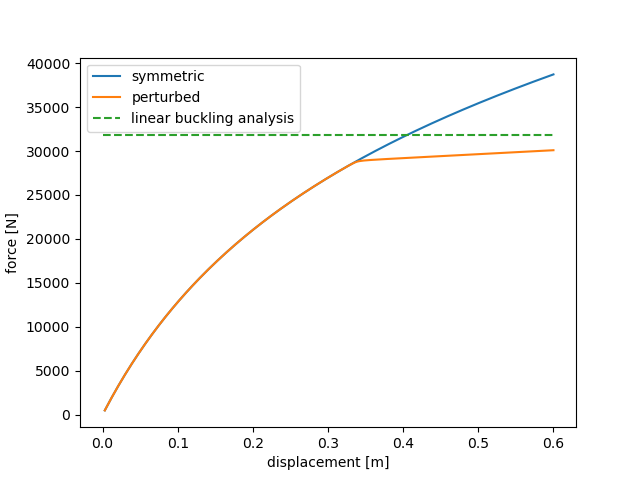

In [13]:
perturbed = getFu(globdat)
plt.figure()
plt.plot(nonlin_elas[0],nonlin_elas[1],label='symmetric')
plt.plot(perturbed[0],perturbed[1],label='perturbed')
plt.plot([0,0.6],[bucklingLoad,bucklingLoad],'--',label='linear buckling analysis')
plt.xlabel('displacement [m]')
plt.ylabel('force [N]')
plt.legend()